# Exploratory Data Analysis (EDA) Template

### 1. Importació de Biblioteques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sweetviz as sv

****
### 2. Carregar el dataset

In [4]:
df = pd.read_csv('/Users/nicolakorff/Desktop/ML/IT_Academy/bank_dataset.CSV')

****
### 3. Mostra de les primeres files del dataset

In [5]:
# Sense límits de visualització de columnes per veure-les totes a una primera vista.
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


****
### 4. Informació general del dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [7]:
# Info rmació més concreta de les columnes i files
print('Cuantitat de Files i columnes:',df.shape)
print('Nombre columnas:',df.columns)

Cuantitat de Files i columnes: (11162, 17)
Nombre columnas: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


 - Veiem que hi ha 16 columnes amb categoria principal 'diposit'. Algunes contenen valors numèrics i altres categòrics.

**Enumerem a continuació per separat:**

In [9]:
# Valors categórics 
cat_features = [column for column in df.columns if df[column].dtype=='O']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [10]:
# Valors numérics
num_features = [column for column in df.columns if df[column].dtype!='O']
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

****
### 5. Descripció estadística del dataset

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


****
### 6.1. Histograma de cada variable numèrica

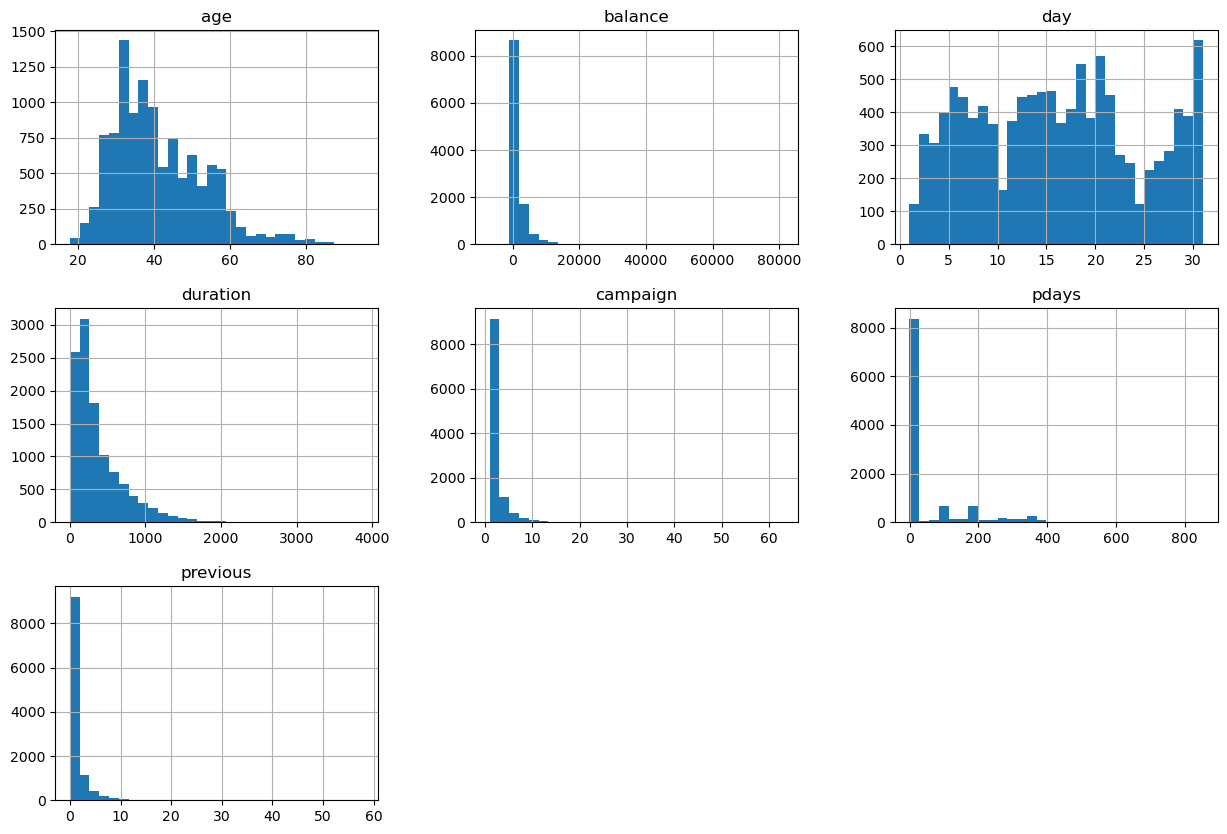

In [12]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

### 6.2.1. Visualització en columnes de cada variable categòrica

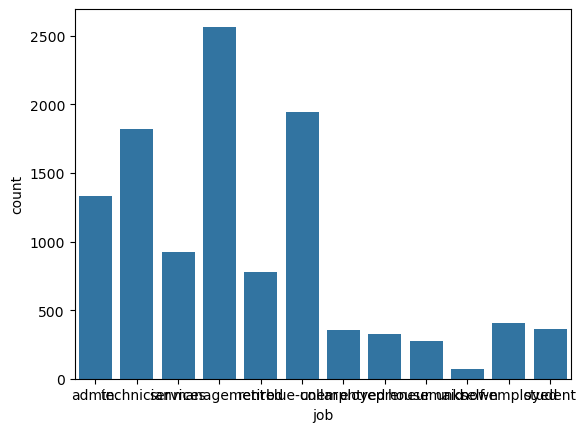

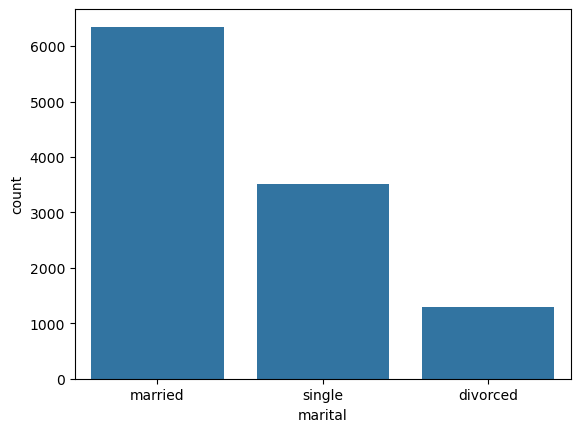

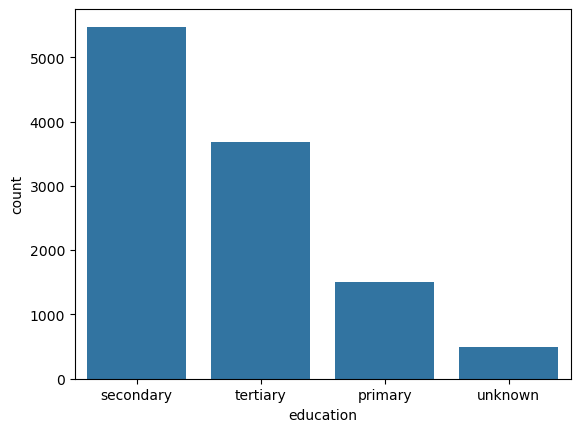

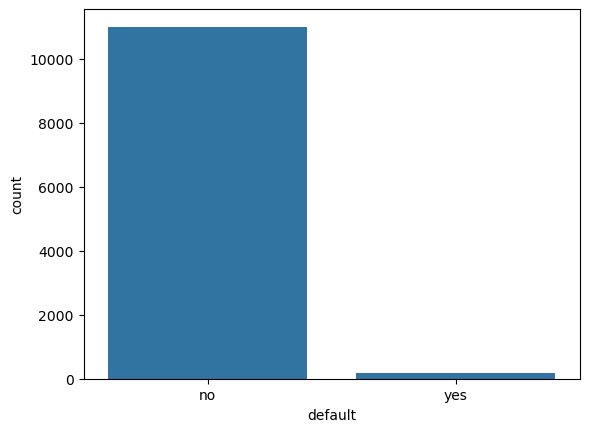

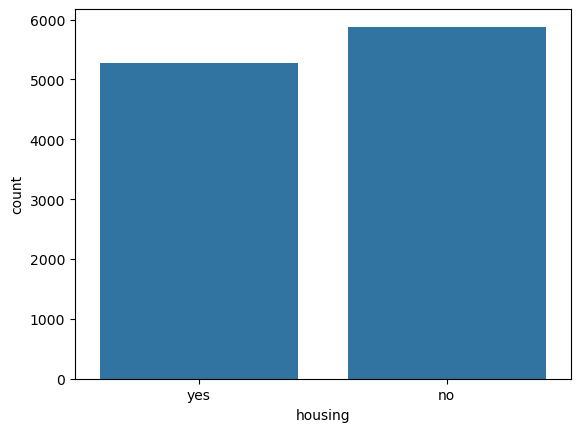

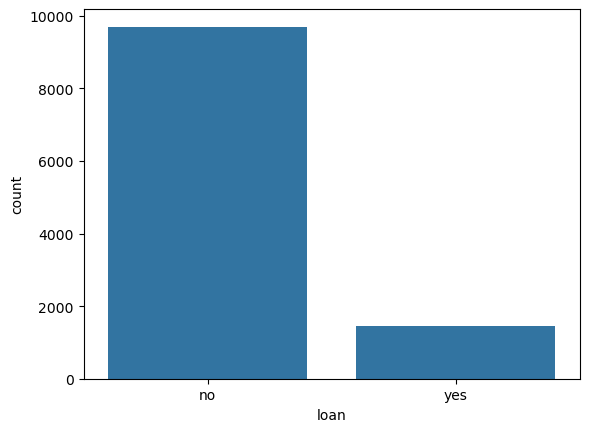

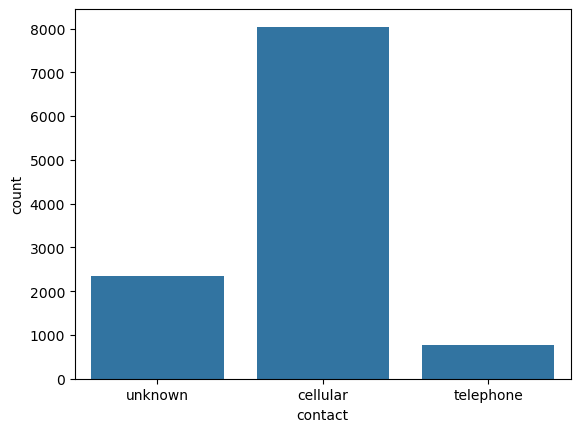

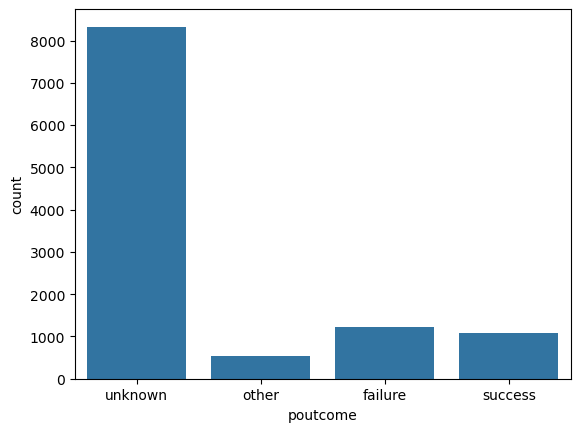

In [14]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.show()

### 6.2.2. Comptar els valors de cada variable categòrica

In [15]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

In [16]:
for feature in cat_features:
    print(f"La variable {feature.upper()} tiene categorias: {df[feature].nunique()}\
    \n{df[feature].value_counts()}\
    \n \n------------------------\n")

La variable JOB tiene categorias: 12    
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64    
 
------------------------

La variable MARITAL tiene categorias: 3    
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64    
 
------------------------

La variable EDUCATION tiene categorias: 4    
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64    
 
------------------------

La variable DEFAULT tiene categorias: 2    
default
no     10994
yes      168
Name: count, dtype: int64    
 
------------------------

La variable HOUSING tiene categorias: 2    
housing
no     5881
yes    5281
Name: count, dtype: int64    
 
------------------------

La variable LOAN

### Visualització en columnes de cada variable categòrica

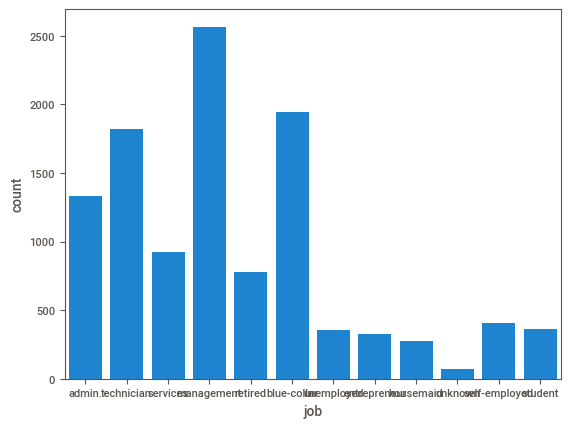

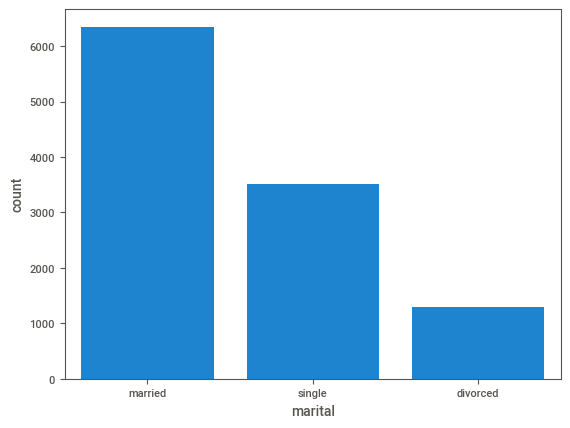

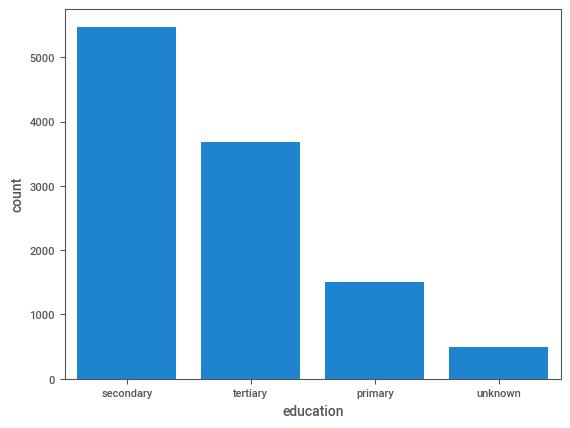

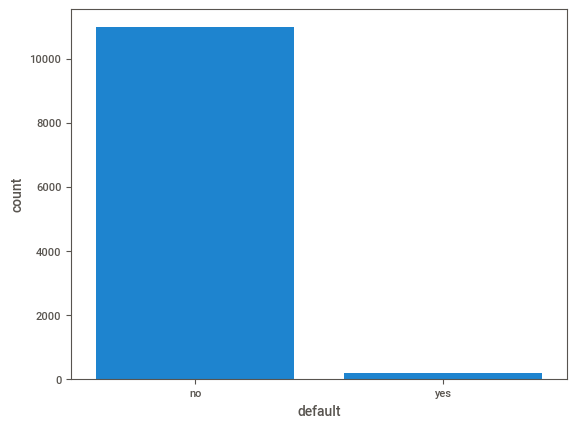

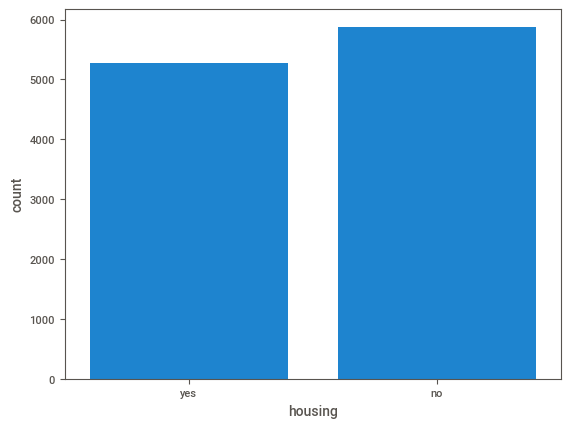

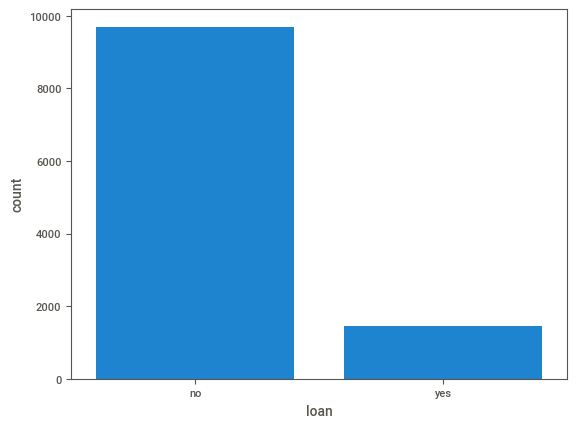

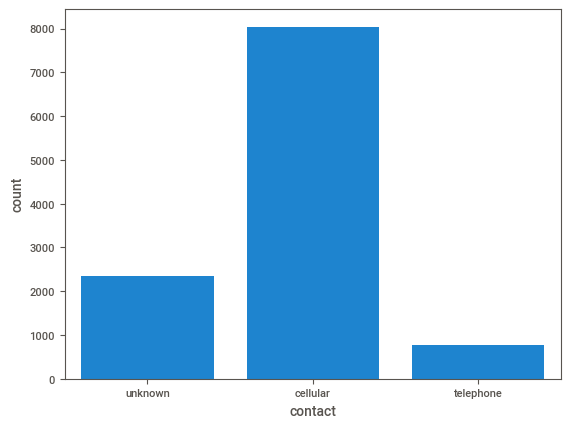

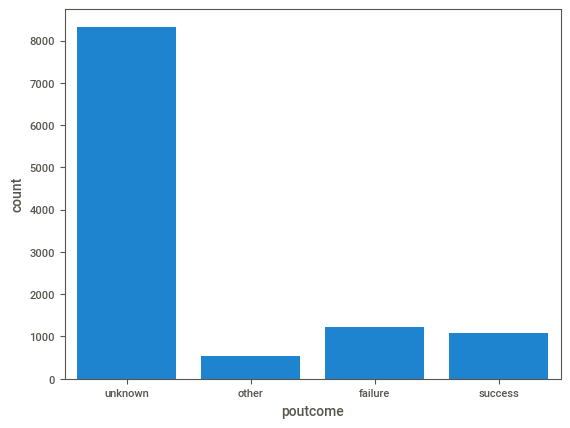

In [171]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for column in categorical_columns:
    sns.countplot(x=df[column])
    plt.show()

****
### 7. Resum de l'observació superficial del dataset

**Descripció de les dades categòriques**
- Es pot comprovar que de les dades recol·lectades, a nivell de professions, les que més apareixen són management,blue colar i tècnics, mentre que les més baixes són les mestresses de casa.
- A nivell d'estat civil, hi ha el doble de casats que de solters i un mínim de divorciats.
- L'escolaritat es presenta amb una clara majoria d'estudis secundaris davant de menys terciaris i pocs primaris.
- De les persones consultades molt pocs tenen deutes no pagats.
- Amb poca diferència s'aprecia una diferència de més persones sense hipoteques que amb.
- Així mateix, una gran majoria no té préstecs pendents.
- La resposta telefònica ha estat majoritàriament amb gran diferència per telèfon mòbil davant del fix.
- Els resultats de campanyes anteriors són baixos, sent estranyament majoritàriament desconegut, seguit de fracàs i amb poca diferència èxit.

**Descripció de les dades numèriques**
- La majoria de les persones presenta una edat que ronda entre els 30 i els 40 anys, sent la mínima per sota de 20 i la màxima per sobre de 90 anys.
- El sou dels entrevistats és majoritàriament baix-mitjà.
- Dels dies en què es van fer les consultes i que va haver-hi resposta el que més resposta va haver-hi va ser l'últim del mes seguit dels dies que ronden el 20. Això pot ser degut a moltes causes diferents.
- La durada de les trucades és predominantment curta.
- El nombre de contactes o intents de contacte realitzats durant la campanya són, així mateix, predominantment pocs, entre 1 i 4 trucades. I sent alguna vegada fins a 12 vegades.
- L'últim dia de contacte amb els cleints és majoritàriament curt, en molt pocs casos de campanyes anteriors més d'un any.
- Finalment, el nombre de contactes previs realitzats són predominantment pocs, entre 1 i 3. Sent el màxim de 11 vegades.

****
### 8. Valors nuls

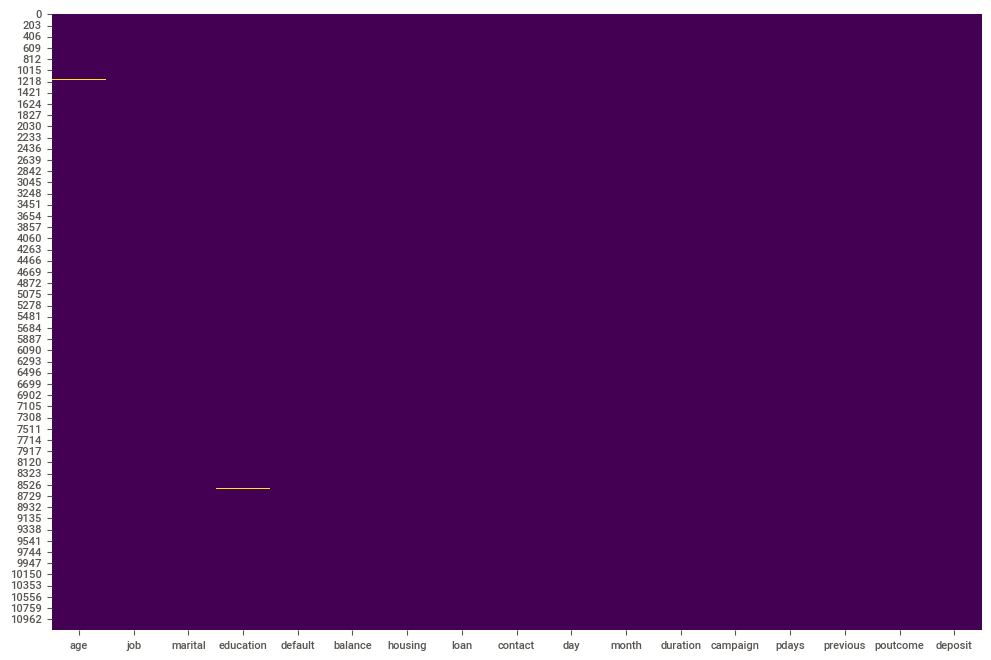

In [238]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [173]:
# Comptar valors nuls per columna
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

- Observem que hi tres columnes que contenen valors nuls: 'age' (numèric), 'marital' i 'education' (categèric)

### 8.1. Tractament de valors nuls

In [242]:
# Convertir els valors numèrics al valor '0'
df= df.fillna({'age':'0'})
df.isnull().mean().sort_values(ascending=False)

age          0.000896
education    0.000627
marital      0.000448
month        0.000000
poutcome     0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
contact      0.000000
day          0.000000
job          0.000000
loan         0.000000
housing      0.000000
balance      0.000000
default      0.000000
deposit      0.000000
dtype: float64

In [243]:
# Convertir els valors categòrics nuls a l'etiquetaa: 'unknown' 
df= df.fillna({'education':'unknown', 'marital':'unknown'})
df.isnull().mean().sort_values(ascending=False)

age          0.0
day          0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
contact      0.0
job          0.0
loan         0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
deposit      0.0
dtype: float64

 - No resten valors nuls

****
### 9. Descubrir outliers i el seu tractament mitjançant Winsorització

- De l'observació de les dades superficial de l'histograma i de la descripció de max., min. i mean, es pot intuir possibles outliers a les següents categories: 'duration' i 'campaign'.

**Categoria 'duration'**

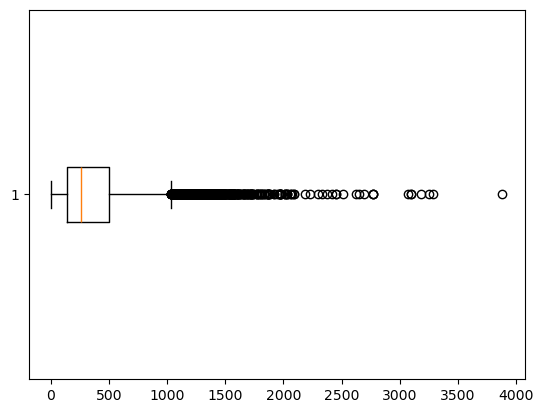

In [18]:
# Mostra dels outlier a través del diagrama de caixa
plt.boxplot(df['duration'], vert=False)
plt.show()

In [19]:
# desviacions estàndard
# Importar les funcions zscore 
from scipy.stats import zscore

# Càlcul de la puntuació z per a cada punt de dades i el valor absolut
z_scores = zscore(df['duration'])
abs_z_scores = np.abs(z_scores)

# Selecció dels valors outliers amb un llindar de 3
outliers = df[abs_z_scores > 3]
outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
11,30.0,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,yes
12,29.0,management,married,tertiary,no,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes
22,43.0,management,divorced,tertiary,no,388,yes,no,unknown,8,may,2087,2,-1,0,unknown,yes
33,40.0,blue-collar,married,secondary,no,10,yes,no,unknown,9,may,1692,2,-1,0,unknown,yes


In [20]:
# Obtenir el nombre de valors outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 201


In [21]:
# Importar les funcions median_abs_deviation
from scipy.stats import median_abs_deviation

# Obtenir el valor MAD
mad_score = median_abs_deviation(df['duration'])
mad_score

144.0

In [22]:
# Winsorització
from scipy.stats.mstats import winsorize
df_winsorized = df.copy()
df_winsorized['duration'] = winsorize(df_winsorized['duration'],\
  limits = [0.05, 0.05], inplace = True)

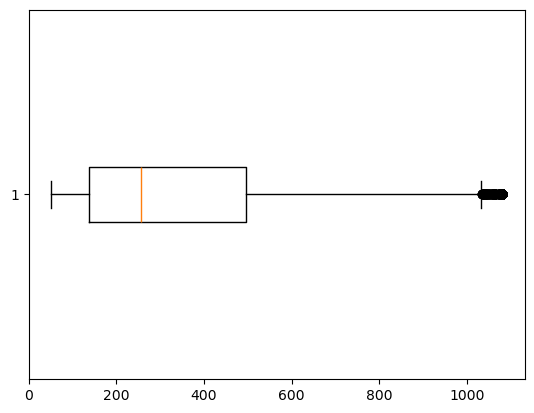

In [23]:
# Mostra del resultat després de la winsorització
plt.boxplot(df_winsorized['duration'], vert=False)
plt.show()

**Categoria 'campaign'**

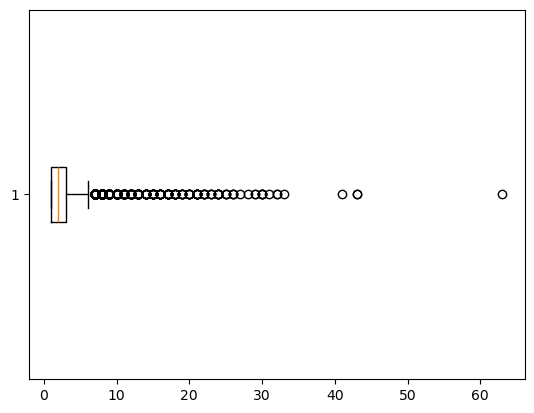

In [24]:
# Mostra dels outlier a través del diagrama de caixa
plt.boxplot(df['campaign'], vert=False)
plt.show()

In [25]:
# desviacions estàndard

# Càlcul de la puntuació z per a cada punt de dades i el valor absolut
z_scores = zscore(df['campaign'])
abs_z_scores = np.abs(z_scores)

# Selecció dels valors outliers amb un llindar de 3
outliers = df[abs_z_scores > 3]
outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
135,44.0,technician,divorced,secondary,no,1262,yes,no,unknown,26,may,788,11,-1,0,unknown,yes
187,34.0,technician,divorced,secondary,no,1451,yes,no,unknown,30,may,1097,15,-1,0,unknown,yes
196,31.0,unemployed,divorced,primary,no,0,yes,no,unknown,30,may,745,12,-1,0,unknown,yes
197,29.0,management,single,tertiary,no,0,yes,no,unknown,30,may,539,12,-1,0,unknown,yes
212,29.0,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,yes


In [26]:
# Obtenir el nombre de valors outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 210


In [27]:
# Obtenir el valor MAD
mad_score = median_abs_deviation(df['campaign'])
mad_score

1.0

In [28]:
# Winsorització
df_winsorized = df.copy()
df_winsorized['campaign'] = winsorize(df_winsorized['campaign'],\
  limits = [0.05, 0.05], inplace = True)

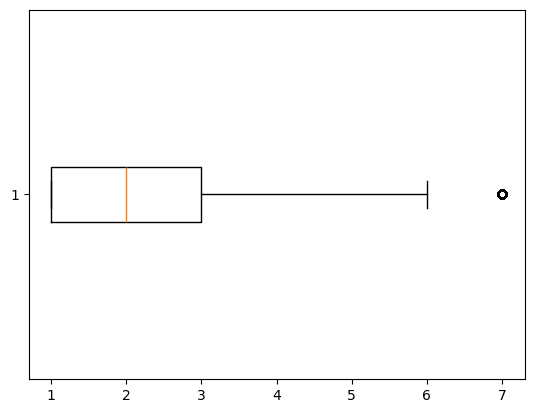

In [29]:
# Mostra del resultat després de la winsorització
plt.boxplot(df_winsorized['campaign'], vert=False)
plt.show()

****
### 10. Verificar distribució de la variable objectiu 'deposit'

- Veure si hi ha desbalance de classe:

In [31]:
print(df['deposit'].value_counts(normalize=True) * 100)

deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


- Negatiu

****
### 11. Matriu de Correlació

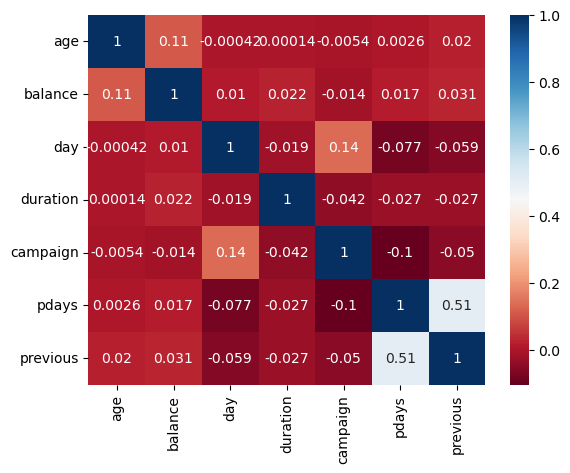

In [32]:
study_df = df[['age','balance', 'day', 'duration',
       'campaign', 'pdays', 'previous']]
sns.heatmap(study_df.corr(), cmap='RdBu', annot=True)
plt.show()

**Comentaris**
- Es pot comprovar al mapa la correlació entre els diferents valors numèrics.
- S'hi observa una relació important entre edat i saldo al banc. Així com entre el dia que es van fer les trucades amb els potencials clients i les campanyes realitzades.

****
### 12. Anàlisis específics

### 12.1. Edats per feines

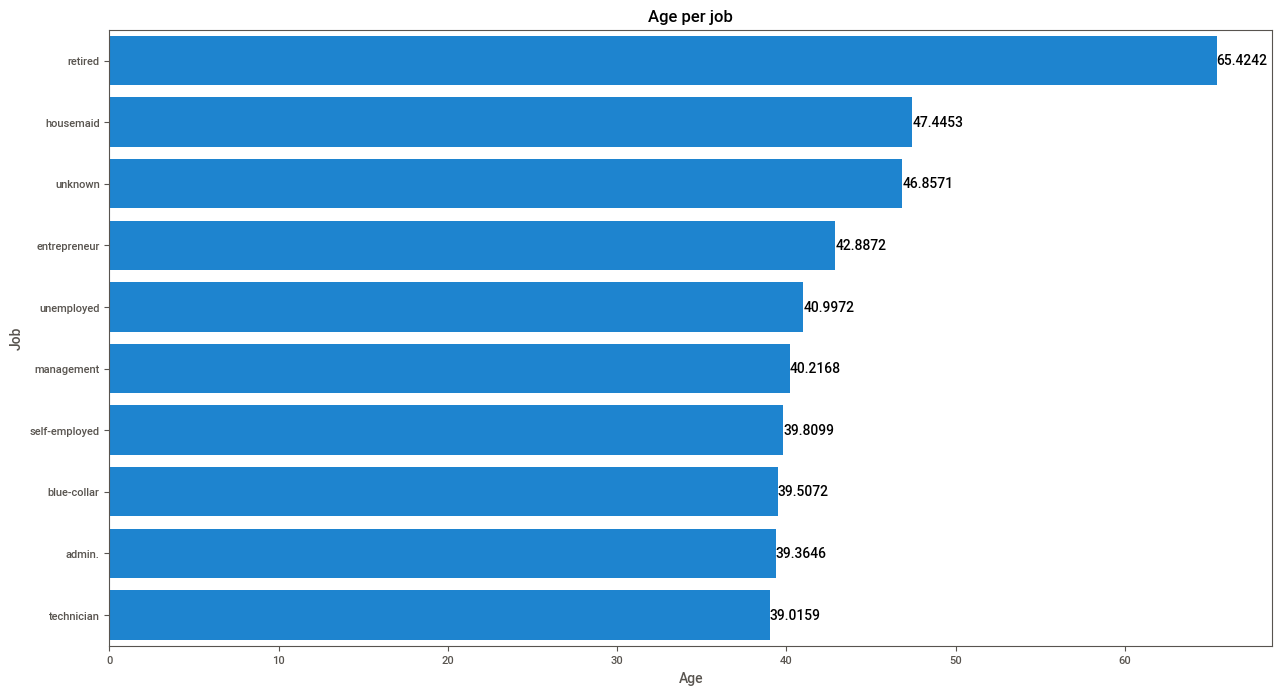

In [257]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df.groupby('job')['age'].mean().nlargest(10).reset_index(),
                 x='age',
                 y = 'job')

ax.set(xlabel='Age', ylabel='Job', title = 'Age per job')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [259]:
df.groupby('job')['age'].mean().nlargest(10).reset_index()

,job,age
0,retired,65.424165
1,housemaid,47.445255
2,unknown,46.857143
3,entrepreneur,42.887195
4,unemployed,40.997199
5,management,40.216849
6,self-employed,39.809877
7,blue-collar,39.507209
8,admin.,39.364591
9,technician,39.015934


- Es pot apreciar que l'edat determina la professió. Evidentment, jubilats son d'edats més avançades, la segona posició es per dones de casa, seguit de desconeguts, autònoms i persones sense feina.

### 12.2. Saldo per tipus de feines

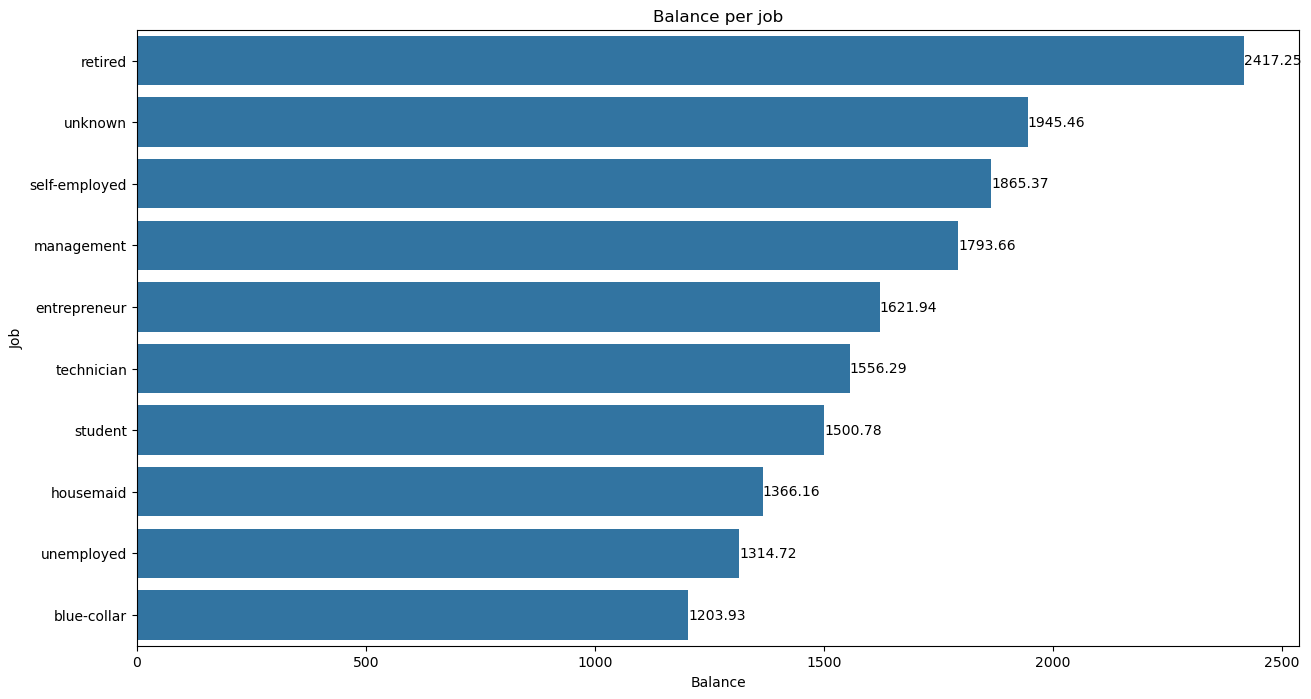

In [35]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.barplot(data=df.groupby('job')['balance'].mean().nlargest(10).reset_index(),
                 x='balance',
                 y = 'job')

ax.set(xlabel='Balance', ylabel='Job', title = 'Balance per job')
plt.bar_label(ax.containers[0], size=10)
plt.tight_layout
plt.show()

In [36]:
df.groupby('job')['balance'].mean().nlargest(10).reset_index()

,job,balance
0,retired,2417.250643
1,unknown,1945.457143
2,self-employed,1865.372840
3,management,1793.663679
4,entrepreneur,1621.942073
5,technician,1556.294569
6,student,1500.783333
7,housemaid,1366.160584
8,unemployed,1314.719888
9,blue-collar,1203.926440


- Es pot veure clarament la relació del saldo al compte bancari amb la feina del client. Les persones jubilades tenen el més alt, seguits per una feina que es deconeguda i molt seguit per autònoms i gestió o direcció. Relacionat també amb l'edat.

### 12.3. Quines edats amb quines feines tenen diposits y quines no

In [37]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [38]:
deposits = ['yes', 'no']

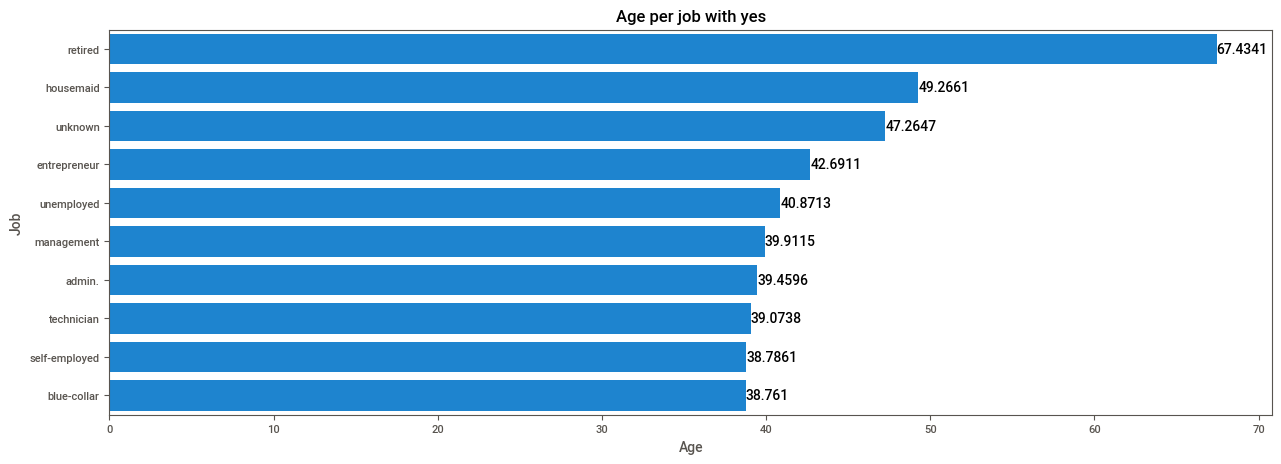

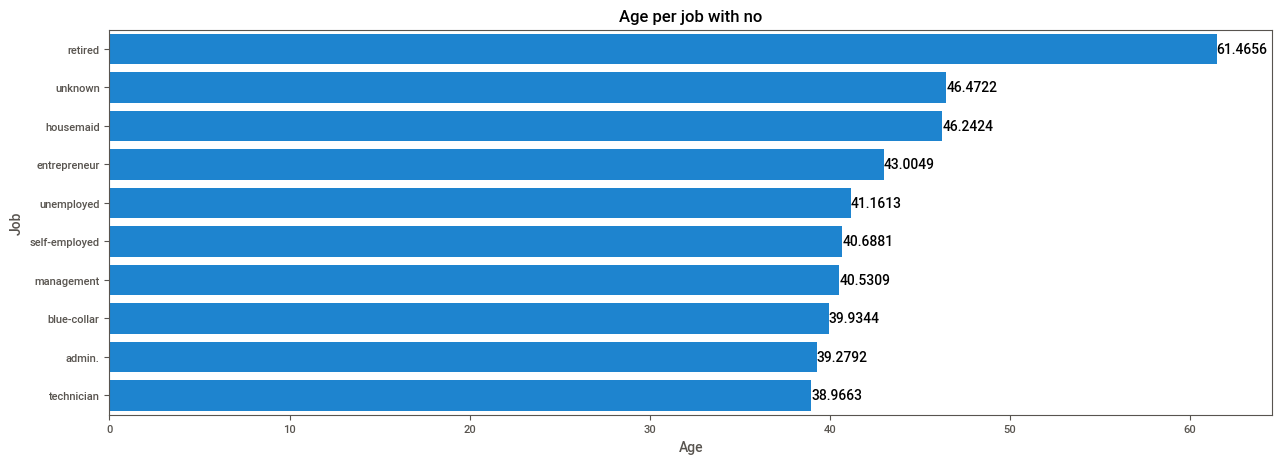

In [267]:
for deposit in deposits:
    
    plt.figure(figsize=(15,5))
    ax = sns.barplot(
                    x = df[df['deposit']==deposit].groupby('job')['age'].mean().nlargest(10).values,
                    y = df[df['deposit']==deposit].groupby('job')['age'].mean().nlargest(10).index
    )
    ax.set(xlabel='Age', ylabel='Job', title = f'Age per job with {deposit}')
    plt.bar_label(ax.containers[0], size=10)
    plt.tight_layout
    plt.show()

- S'observa que els jubilats, els autònoms i els directors o gerents son el clients que més adquireixen dipòsits.

### 12.4. Diferencia de diposit entre casats i solters

In [39]:
df['marital'].value_counts()

marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64

In [40]:
df = df[df['marital']!='unknown']
df['marital'].value_counts()

marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='age'>

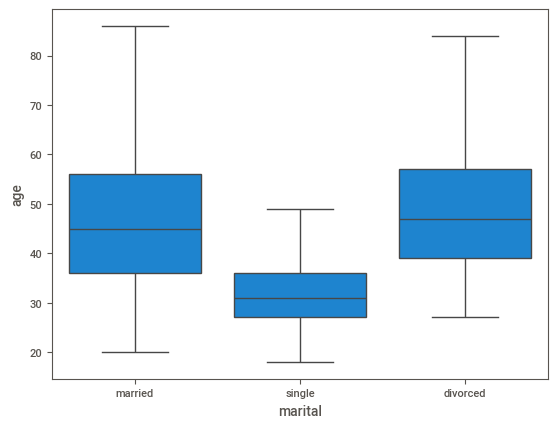

In [278]:
uno_df = df[df['deposit']=='yes']

sns.boxplot(data=uno_df,
           x='marital',
           y='age',
           showfliers=False)

- Es pot observar que les persones casades han comprat més diposit seguits per persones divorciades i úlims solters. Els solters son la franja d'edat més jove. 

### 13. EDA automàtic amb Sweetviz

In [41]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 14. Conclusions

- En analitzar la base de dades s'han pogut diferenciar els descriptius bàsics i separar-ne les característiques rellevants: són 'age', 'balance', 'day', 'campaign' segons el mapa de correlacions. Afegiria les categories 'job', 'education' i 'marital' a nivell categòric. S'han detectat i corregit els valors nuls i els outliers.
- La variant objectiu 'deposit' no està desbalancejada.
- S'ha pogut observar que la gent jove té més tendència a estar soltera, tots dos casos porten a menys adquisicions de dipòsits. Però això pot ser perquè s'ha contactat amb més gent casada que soltera o divorciada.
- D'altra banda, les professions relacionades amb les edats mantenen una relació equitativa en l'adquisició de dipòsits, sent les persones retirades de gent gran, els autònoms i els gerents o directors d'edat més avançada els targets més positius.
- La majoria de persones enquestades tenen estudis de secundària.
- Les persones tenen, en general, menys propietats immobiliàries, però amb una diferència mínima.
- Així mateix, la majoria d'enquestats no tenen crèdits bancaris ni deutes pendents.
- També es pot comprovar que com més gran és el saldo, més possibilitats hi ha que s'adquireixin dipòsits.
- La campanya té més resposta durant el mes de maig amb diferència sobre la resta.
- L'outcome és en general més negatiu que positiu, encara que hi ha molts valors desconeguts, cosa que requeriria dades més correctes per a la propera campanya.
- La majoria de contactes aconseguits han estat per via telèfon mòbil.